In [27]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lr
from IPython.display import Audio

# DFT Eigentschaften

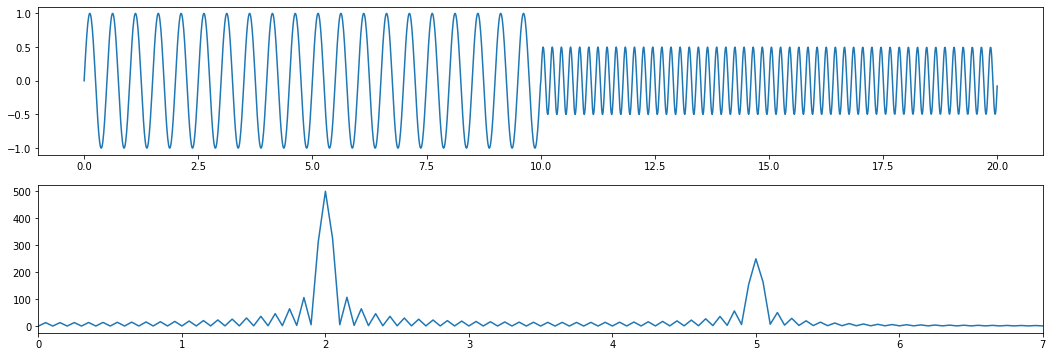

In [2]:
# amplitude:
sr = 100
length = 20
t = np.linspace(0, length, sr * length)
x = np.concatenate((np.sin(t[:sr * length // 2] * 2 * np.pi * 2),
                    np.sin(t[:sr * length // 2] * 2 * np.pi * 5) * 0.5))

dft = np.fft.fft(x)

N = x.size
k = np.arange(N)
f = sr * k / N # Formel zur Berechnung der Freq.-Koeff.

plt.figure(figsize=(18, 6))
plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.subplot(2, 1, 2)
plt.plot(f, np.abs(dft))
plt.xlim(0, 7)
plt.show()

[   0    1    2 ... 1997 1998 1999]


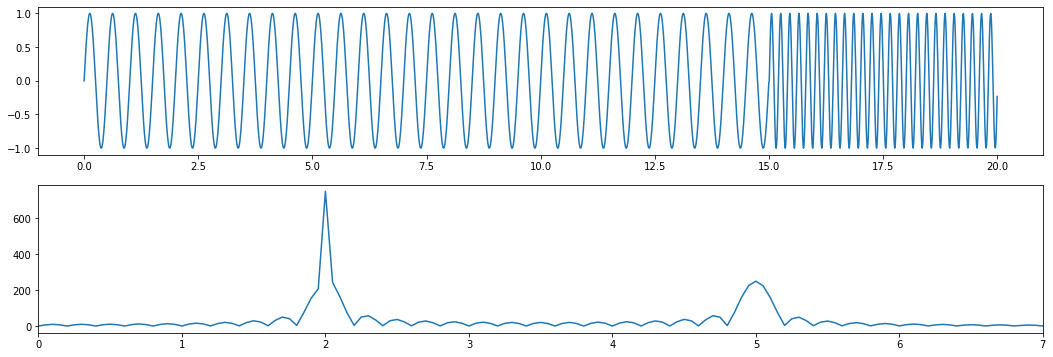

In [3]:
# laenge:
sr = 100
length = 20
t = np.linspace(0, length, sr * length)
x = np.concatenate((np.sin(t[:3 * sr * length // 4] * 2 * np.pi * 2),
                    np.sin(t[:sr * length // 4] * 2 * np.pi * 5)))

dft = np.fft.fft(x)

N = x.size
k = np.arange(N)
f = sr * k / N # Formel zur Berechnung der Freq.-Koeff.
print(k)
plt.figure(figsize=(18, 6))
plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.subplot(2, 1, 2)
plt.plot(f, np.abs(dft))
plt.xlim(0, 7)
plt.show()

# sr = 100
# 0 - 100 Hz (analyse)
# length --> 0, 50, 100 || 0, 25, 50, 75, 100

In [4]:
# frequenz-aufloesung:
def f_coef(k, sr, N):
    return sr * k / N

# sr = 44100
# sr = 48000
# sr = 10
# sr = 100
sr = 10000000000

length = 2
N = sr * length

print('Länge\t\t\t%d sek.\nFrequenz Auflösung:\t%0.2f Hz' % (length, f_coef(k=1, sr=sr, N=N)))

print()

length = 4
N = sr * length
print('Länge\t\t\t%d sek.\nFrequenz Auflösung:\t%0.2f Hz' % (length, f_coef(k=1, sr=sr, N=N)))

Länge			2 sek.
Frequenz Auflösung:	0.50 Hz

Länge			4 sek.
Frequenz Auflösung:	0.25 Hz


/Users/liujia/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


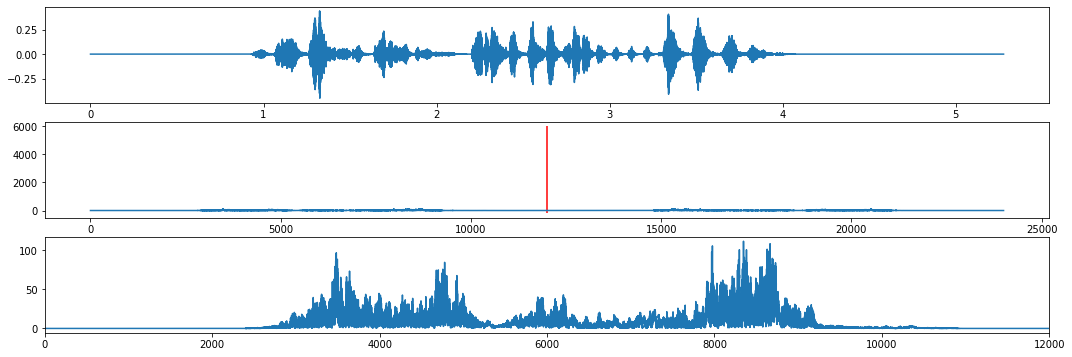

In [29]:
x, sr = lr.load('/Users/liujia/Desktop/MF_jupyter/Computergestuetzte-Musikforschung-WiSe_2020_21/CMF/07_dft_eigenschaften_implementierung/bird.mp3', sr=None)
t = np.linspace(0, x.size / sr, x.size)

display(Audio(x, rate=sr))

dft = np.fft.fft(x)

N = x.size
k = np.arange(N)
f = sr * k / N # Formel zur Berechnung der Freq.-Koeff.

plt.figure(figsize=(18, 6))
plt.subplot(3, 1, 1)
plt.plot(t, x)
plt.subplot(3, 1, 2)
plt.plot(f, np.abs(dft))
plt.vlines(sr / 2, -200, 6000, colors=[1, 0, 0, 1]) # nyquist
plt.subplot(3, 1, 3)
plt.plot(f, np.abs(dft))
plt.xlim(0, sr / 2)
plt.show()

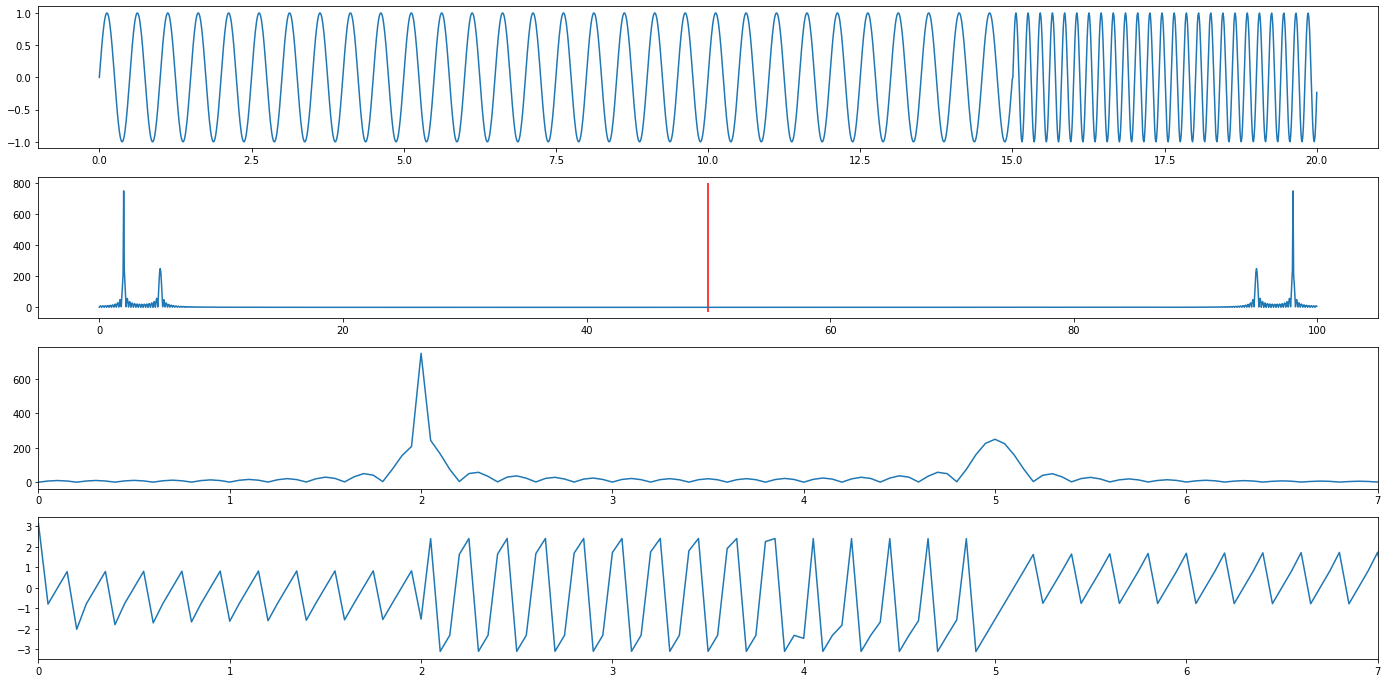

In [19]:
sr = 100
length = 20
t = np.linspace(0, length, sr * length)
x = np.concatenate((np.sin(t[:3 * sr * length // 4] * 2 * np.pi * 2),
                    np.sin(t[:sr * length // 4] * 2 * np.pi * 5)))

dft = np.fft.fft(x)

N = x.size
k = np.arange(N)
f = sr * k / N # Formel zur Berechnung der Freq.-Koeff.

plt.figure(figsize=(24, 12))
plt.subplot(4, 1, 1)
plt.plot(t, x)
plt.subplot(4, 1, 2)
plt.plot(f, np.abs(dft))
plt.vlines(sr / 2, -30, 800, colors=[1, 0, 0, 1])
plt.subplot(4, 1, 3)
plt.plot(f, np.abs(dft))
plt.xlim(0, 7)
plt.subplot(4, 1, 4)
plt.plot(f, np.angle(dft), '-')
plt.xlim(0, 7)
plt.show()

# DFT Implementierung

${\displaystyle X_k = \sum_{n = 0}^{N - 1} \left( x_n \cdot e^{-{\frac {2 \pi i k n}{N}}} \right)}$

$\left\{X_{k} \right\} := X_{0}, X_{1}, \ldots, X_{N-1}$

$x_n$ ist bei uns `x`

$n$ ist ein Zeitindex; bei uns `t`

$X_k$ ist bei uns `winding_analysis`

$k$ ist der Frequenz-Index (also nicht die Frequenz in Hz), d.h. bei uns  die Indizes von `winding_freqs`

$N$ ist gleichzeitig der letzte Zeitindex, wie auch der letzte Frequenz-Index

In [20]:
def calc_dft(x):

    N = x.size
    n = np.arange(N)

    dft = np.zeros((N,), dtype=complex)

    for k in range(N):
        e = np.exp(-1 * 2 * np.pi * 1j * n * k / N)
        dft[k] = np.sum(x * e)
    
    return dft

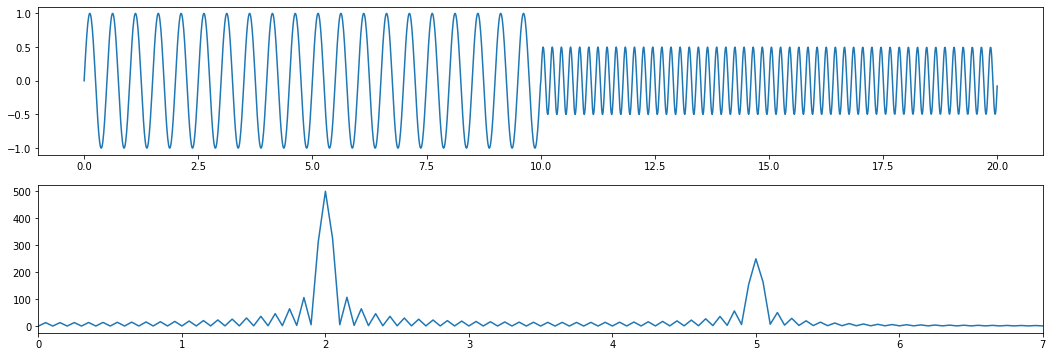

In [21]:
# obiges beispiel mit calc_dft:
sr = 100
length = 20
t = np.linspace(0, length, sr * length)
x = np.concatenate((np.sin(t[:sr * length // 2] * 2 * np.pi * 2),
                    np.sin(t[:sr * length // 2] * 2 * np.pi * 5) * 0.5))

dft = calc_dft(x)

N = x.size
k = np.arange(N)
f = sr * k / N # Formel zur Berechnung der Freq.-Koeff.

plt.figure(figsize=(18, 6))
plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.subplot(2, 1, 2)
plt.plot(f, np.abs(dft))
plt.xlim(0, 7)
plt.show()

In [22]:
%timeit np.fft.fft(x)

47.7 µs ± 1.69 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [23]:
%timeit calc_dft(x)

245 ms ± 3.82 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
print('`fft` ist in etwa', (201 * (10 ** (-3))) / (33.8 * (10 ** (-6))), 'mal schneller als `calc_dft`')

`fft` ist in etwa 5946.745562130179 mal schneller als `calc_dft`


/Users/liujia/miniconda3/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


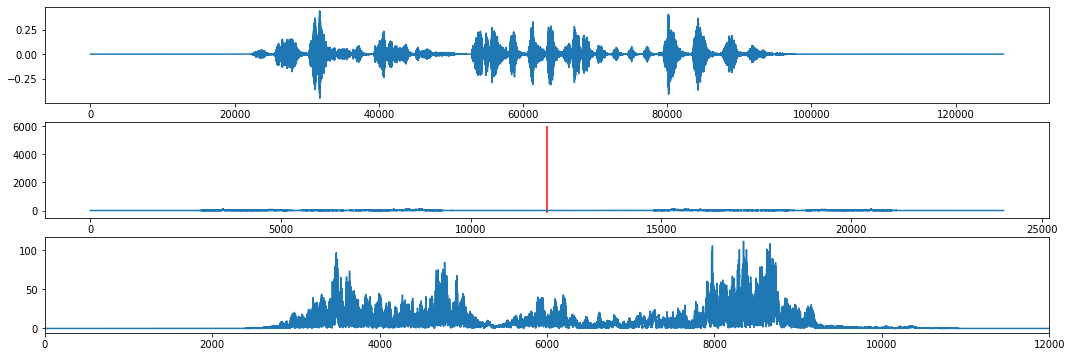

In [31]:
# vorsicht: dauert..........
x, sr = lr.load('/Users/liujia/Desktop/MF_jupyter/Computergestuetzte-Musikforschung-WiSe_2020_21/CMF/07_dft_eigenschaften_implementierung/bird.mp3', sr=None)
t = np.arange(x.size)

display(Audio(x, rate=sr))


#compare:
##dft = calc_dft(x)
##dft = np.fft.fft(x)

N = x.size
k = np.arange(N)
f = sr * k / N # Formel zur Berechnung der Freq.-Koeff.

plt.figure(figsize=(18, 6))
plt.subplot(3, 1, 1)
plt.plot(t, x)
plt.subplot(3, 1, 2)
plt.plot(f, np.abs(dft))
plt.vlines(sr / 2, -200, 6000, colors=[1, 0, 0, 1])
plt.subplot(3, 1, 3)
plt.plot(f, np.abs(dft))
plt.xlim(0, sr / 2)
plt.show()